# Projeto 2 - NLP

-----

Nome:  Johnny Hideki Horita <br>
Turma: 780

Os segundo projeto do módulo de Machine Learning será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 3 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente;


- Data de divulgação: 11/01/2022;


- Aula de monitoria: 19/01/2022;


- Data de entrega: 26/01/2022;


- Entrega através do Class: Árvore de Decisão -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```   
csv: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv```


## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

### Um termômetro para o seu desenvolvimento

Após a correção do seu projeto, o professor irá disponibilizar a sua acurácia obtida na base de submissão. Você pode interpretar esse resultado como a simulação do resultado do seu modelo em produção. Uma diferença entre o resultado do estudo e o resultado de submissão indica um grau de **overfitting** no seu modelo.

-------

# Desenvolvimento do projeto

## 1. Análise de consistência dos dados

### Importando bibliotecas

In [1]:
%%time

# Bibliotecas
import os
import re
import string
import random
import time

import pandas as pd
import numpy as np
import datetime
import requests
import warnings
from collections import Counter
from pprint import pprint

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly.offline as py
import plotly_express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, doc2vec

# Logistic Regression
from sklearn.linear_model import LogisticRegression 
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# Naive Bayes (Gaussian, Multinomial,BernoulliNB)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
# KNN (k-nearest neighbor)
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost Classifier
from xgboost import XGBClassifier
# LGBM Classifier
from lightgbm import LGBMClassifier
# Ada Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
# Dummy Boosting Classifier
from sklearn.dummy import DummyClassifier
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from unidecode import unidecode

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#!pip install enelvo
from enelvo.normaliser import Normaliser

# Abaixo seguem 2 formas para a instalação do spaCy: via conda ou pip
# Instalação utilizando conda
#!conda install -c conda-forge spacy

# Instalação utilizando Pip
#!pip install -U pip setuptools wheel
#!pip install -U spacy

import spacy
from spacy.util import compounding
from spacy.util import minibatch

from tqdm import tqdm

import shap

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from IPython.core.display import HTML as Center
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

print('Bibliotecas carregadas com sucesso.')

Bibliotecas carregadas com sucesso.
Wall time: 14.8 s


### Padrões

In [2]:
# Definição de padrões para gráficos e cores

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

colors = sns.color_palette("pastel") # deep, pastel, Set1 Set2 Set3, icefire, tab10, muted, colorlind, coolwarm
cmap_colors = 'GnBu'

font_path = "./fonts/CabinSketch-Bold.ttf"

In [3]:
# Definição de padrões para centralização de gráficos no notebook

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

### Funções

In [4]:
# Função de avaliação dos valores de NaN no dataframe

def missing_values_table(df):
    '''
    Função para verificar se existem valores nulos no dataframe
    Entrada:
        df - dataframe;
        
    Resultado: 
        Apresentação dos valores nulos no dataframe.

    '''
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Valores faltantes', 1 : '% de Valores Totais'})
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
    '% de Valores Totais', ascending=False).round(1)
    print ("O dataframe tem " + str(df.shape[1]) + " colunas e " + str(df.shape[0]) + " linhas.\n"      
        "Existem " + str(mz_table.shape[0]) +
          " colunas que têm valores faltantes.")
    mz_table.to_excel('missing_and_zero_values.xlsx', freeze_panes=(1,0), index = True)
    return mz_table


In [5]:
# Função de avaliação de modelos apresentação da matriz de confusão
score = []

def test_models(model_list, col_model_name, col_model, tec_model, X_train, X_test, y_train, y_test):
    '''
    Função para avaliação de modelos de predição
    Entrada:
        model_list - lista de modelos;
        col_model_name - label da lista de modelos, contendo o nome do modelo;
        col_model - label da lista de modelos, contendo a instancia do modelo de predição;
        tec_model - definição de tratamento de modelos;
        X_train - classe de treino
        X_test - classe de teste
        y_train - classe de treino
        y_test - classe de teste
        
    Resultado: 
        Apresentação de métricas de predição de modelos.

    '''
    for mdl in model_list:
        start = time.time()

        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        
        print("")        
        print("=" * 55)
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " % accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("MAE        : %0.4f " % mean_absolute_error(y_test, y_predict))
        print("RMSE       : %0.4f " % np.sqrt(mean_squared_error(y_test, y_predict)))
        print("R2         : %0.4f " % r2_score(y_test, y_predict))
        print("")
        print(classification_report(y_test, y_predict))

        global score
        score.append([mdl[col_model_name], tec_model, accuracy_score(y_test, y_predict)])
        
        cm = confusion_matrix(y_test, y_predict)
        labels = ['Negativo','Positivo','Neutro']
        dsp = ConfusionMatrixDisplay(cm, display_labels=labels)
        dsp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
        plt.grid(False)
        plt.show()        
        
        end = time.time()
        elptime = end - start
        converted_time = str(datetime.timedelta(seconds=elptime))
        print(f'Partial time: {converted_time}')
                

In [6]:
# Função para calcular a importância da variável no modelo

rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    # Adequando as classes para treino
    alg.fit(dtrain[predictors], dtrain[target])
    
    # Previsão de saída para o conjunto de dados de teste
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    # Utilizando o Cross Validation
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='accuracy')
    
    #Exibindo relatório:
    print (f"\nRelatório do Modelo {alg}")
    print ("\nAcuracia : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predictions))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


In [7]:

def read_corpus(list_sentences, tokens_only=False):
    if tokens_only:
        # For test data, just return sentences
        return list_sentences
    else:
        # For training data, add tags
        lista = []
        for i, line in enumerate(list_sentences):
            lista.append(doc2vec.TaggedDocument(line, [i]))

        return lista
    

In [8]:
# Função para contagem de palavras 

def words_unique(sentiment, numwords, raw_words):
    '''
    Função para contagem de palavras 
    Entrada:
        segmento - Categoria do segmento (ex. 2 = 'Neutro');
        numwords - quantas palavras específicas se pretende ver no resultado final; 
        raw_words - lista do texto;
        
    Resultado: 
        dataframe com informação sobre a palavra específica e quantas vezes aparece no texto (por ordem decrescente com base nas suas contagens).

    '''
    allother = []
    for item in dfc[dfc.sentiment != sentiment]['list_words']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in dfc[dfc.sentiment == sentiment]['list_words']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words


In [9]:
# Abaixo seguem 2 formas para a instalação do spaCy: via conda ou pip

# Instalação utilizando conda
#!conda install -c conda-forge spacy

# Instalação utilizando Pip
#!pip install -U pip setuptools wheel
#!pip install -U spacy

# Bilbioteca em portugues
# Efficiency
#!python -m spacy download pt_core_news_sm

# Accuracy
#!python -m spacy download pt_core_news_lg

spc_pt = spacy.load('pt_core_news_lg')
nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('portuguese')
#Adicionando stopwords que não estão na lista do nltk 
stopwords.append("'")
stopwords.append("pra")
stopwords.append("tá")
stopwords.append("tão")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnny.horita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnny.horita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Função para tratamento da variável de texto para definir melhores valores para classificação da modelagem
# e ou normalizar o tratamento da variável de texto utilizando a biblioteca enelvo

# instanciando
normalizador = Normaliser(tokenizer='readable', sanitize=True, capitalize_acs=True, capitalize_pns=True) # capitalize_inis=True

def nlp_tratar_texto(texto, normalize=False):
    '''
    Função para tratamento de texto 
    Entrada:
        texto - Texto para tratamento;
        normalize - utilizar função de normalização da biblioteca enelvo;
        
    Resultado: 
        Retorna o texto com tratamento de caracteres.

    '''    
    #Remover endereços de sites
    texto_sem_url = re.sub(r'https?:\/\/\S+', '', texto)
        
    #Remover e-mail / users
    #texto_sem_email = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*\.?[A-Za-z0-9]*', '', texto_sem_url)
    texto_sem_email = re.sub(r'[A-Za-z0-9]*@\S+', '', texto_sem_url)
    
    if normalize==True:
        # Tratamento do texto utilizando o enelvo (Normalize)
        texto_norm = normalizador.normalise(texto_sem_email)
    
        #Remover caracteres que não são letras e tokenização
        texto_tratado =  re.findall(r'\b[A-zÀ-úü]+\b', texto_norm.lower())
    else:
        texto_tratado =  re.findall(r'\b[A-zÀ-úü]+\b', texto_sem_email.lower())

    #Remover stopwords
    stop = set(stopwords)
    palavras = [w for w in texto_tratado if w not in stop]
    palavras_string = " ".join(palavras)

    #Instanciar o objeto spacy
    spc_letras =  spc_pt(palavras_string)

    #Lemmização 
    tokens = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in spc_letras]

    #problemas com verbo ir
    ir = ['vou', 'vais', 'vai', 'vamos', 'ides', 'vão']
    tokens = ['ir' if token in ir else str(token) for token in tokens]
    
    return tokens

In [11]:
# Função para apresentar nuvem de palavras

def plot_wordcloud(text, title = None, backcolor = 'white', clrmap = ''):
    '''
    Função para criação de imagem de nuvem de palavras
    Entrada:
        text - palavras para nuvem de palavras;
        title - título da imagem;
        backcolor - ;
        clrmap - ;
        
    Resultado: 
        Imagem com nuvem de palavras.

    '''    
    wordcloud = WordCloud(
                            background_color=backcolor,
                            width=2000, 
                            height=800,
                            colormap=clrmap, 
                            font_path=font_path, 
                            collocations = False)

    wordcloud.generate(text)
    
    fig = plt.figure(figsize=(12,10))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


In [12]:
# Função para diminuir o tamanho do dataframe com alteração dos datatypes

def reduce_mem_usage(df, verbose=True):
    '''
    Função para diminuir o tamanho do dataframe com alteração dos datatypes
    Entrada:
        df - dataframe;
        
    Resultado: 
        Retorna o dataframe com alteração com a configuração mínimas dos tipos do datatype;
        
    '''
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

### Inicializando Dataframe

#### Arquivo Train3Classes.csv

In [13]:
# Importando arquivo

df = reduce_mem_usage(pd.read_csv('./dados/train/Train3Classes.csv'))


Mem. usage decreased to  2.99 Mb (17.5% reduction)


In [14]:
# Quantidade de linhas e colunas

qtl, qtc = df.shape

# Quantidade de linhas duplicadas

qtd, _ = df[df.duplicated(keep=False)].shape

print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtc}')


Quantidade de linhas...........: 95000
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 5


In [15]:
# Informações do dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int8  
 4   query_used  95000 non-null  object
dtypes: int64(1), int8(1), object(3)
memory usage: 3.0+ MB


In [16]:
# Avaliando os valores nulos do dataframe

missing_values_table(df)


O dataframe tem 5 colunas e 95000 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []


---

**Conclusões:** 

O dataframe é composto por 05 colunas e 95.000 registros.

A tabela acima NÃO apresenta valores faltantes.



In [17]:
# Lista de colunas do dataframe

df.columns


Index(['id', 'tweet_text', 'tweet_date', 'sentiment', 'query_used'], dtype='object')

In [18]:
# Listagem das primeiras linhas do dataframe

df.head()


id                                         tweet_text  \
0  1049721159292346368  Rio elege maior bancada policial de sua histór...   
1  1046251157025423360  fiquei tão triste quando eu vi o preço da câme...   
2  1041744620206653440  Para Theresa May, seu plano para o Brexit é a ...   
3  1046937084727107589  caralho eu quero proteger a danielly em um pot...   
4  1047326854229778432                         @SiCaetano_ viva o caos :)   

                       tweet_date  sentiment query_used  
0  Tue Oct 09 18:00:01 +0000 2018          2      folha  
1  Sun Sep 30 04:11:28 +0000 2018          0         :(  
2  Mon Sep 17 17:44:06 +0000 2018          2      exame  
3  Tue Oct 02 01:37:06 +0000 2018          0         :(  
4  Wed Oct 03 03:25:55 +0000 2018          1         :)

#### Arquivo Subm3Classes.csv

In [19]:
# Importando arquivo

dfs = reduce_mem_usage(pd.read_csv('./dados/subm/Subm3Classes.csv'))


Mem. usage decreased to  0.15 Mb (0.0% reduction)


In [20]:
# Quantidade de linhas e colunas

sqtl, sqtc = dfs.shape

# Quantidade de linhas duplicadas

sqtd, _ = dfs[dfs.duplicated(keep=False)].shape

print(f'Quantidade de linhas...........: {sqtl}')
print(f'Quantidade de linhas duplicadas: {sqtd}')
print(f'Quantidade de colunas..........: {sqtc}')


Quantidade de linhas...........: 5000
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 4


In [21]:
# Informações do dataframe

dfs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   tweet_text  5000 non-null   object
 2   tweet_date  5000 non-null   object
 3   query_used  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [22]:
# Avaliando os valores nulos do dataframe

missing_values_table(dfs)


O dataframe tem 4 colunas e 5000 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []


---

**Conclusões:** 

O dataframe é composto por 04 colunas e 5.000 registros.

A tabela acima NÃO apresenta valores faltantes.



In [23]:
# Lista de colunas do dataframe

dfs.columns


Index(['id', 'tweet_text', 'tweet_date', 'query_used'], dtype='object')

In [24]:
# Listagem das primeiras linhas do dataframe

dfs.head()


id                                         tweet_text  \
0  1046764676707753987  Apartamento Vila Mariana Praça Monteiro dos Sa...   
1  1047329264943751169  @FalleNCS @BrasilGameShow quero 1x1 de scout. ...   
2  1045443874947313665  mais uma analógica no correio à minha espera :...   
3  1040484298711814144  Em festa de posse como presidente do STF, Toff...   
4  1045411876887306240  @thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...   

                       tweet_date query_used  
0  Mon Oct 01 14:12:01 +0000 2018         :)  
1  Wed Oct 03 03:35:29 +0000 2018         :)  
2  Thu Sep 27 22:43:37 +0000 2018         :)  
3  Fri Sep 14 06:16:02 +0000 2018      folha  
4  Thu Sep 27 20:36:28 +0000 2018         :)

## 2. Pré-processamento e transformações


---

**Tratamento de variáveis**

- Criação da variável **filtered_words**, onde o texto original (tweet_text) será submetido a tratamentos de texto;<br>


- Criação da variável **join_f_words**, para concatenar as palavras do coluna **filtered_words**;<br>


- Criação da variável **num_words_text**, para contar a quantidade de palavras no texto principal;<br>


- Criação da variável **num_words_join**, para contar a quantirade de palavrvas após tratamento;<br>


- Criação da variável **diff_in_words**, para contar a diferença de palavras entre o texto principal e o tratado;<br>


- Exclusão de variáveis que entendemos não ser relevante para o modelo<br>
    **id**: ID único para o tweet<br>
    **tweet_date**: Data da publicação no Twitter<br>
    **filtered_words**: Variável auxiliar para tratamento de texto<br>


In [25]:
%%time

# Parametro para utilizar o enelvo.normalise (1=sim / 0=Não)
# pois o processo da biblioteca enelvo eleva o tempo de processamento do notebook em 2 horas

# use_normalize = 1
# O processamento desta célula com o tratamendo dos tweets utilizando o biblioteca enelvo leva em média 2 horas, 
# em uma máquina i7 com 12 cores e 32 ram 

# use_normalize = 0
# O processamento desta célula com o tratamendo dos tweets leva em média 10 min, em uma máquina i7 com 12 cores e 32 ram 
    
use_normalize = 1

# Verifica se utiliza o tratamento com Enelvo
if use_normalize==1:
    # Cria uma nova variável utilizando funções para tratamento das palavras do texto
    df['filtered_words'] = df['tweet_text'].apply(lambda w: nlp_tratar_texto(w, normalize=True))
    dfs['filtered_words'] = dfs['tweet_text'].apply(lambda w: nlp_tratar_texto(w, normalize=True))
else:
    # Cria uma nova variável utilizando funções para tratamento das palavras do texto
    df['filtered_words'] = df['tweet_text'].apply(lambda w: nlp_tratar_texto(w))
    dfs['filtered_words'] = dfs['tweet_text'].apply(lambda w: nlp_tratar_texto(w))

# Cria uma nova variável concatenando os tokens gerados pelo tratamento das palavras gerando um novo texto reduzido
df['join_f_words'] = df['filtered_words'].apply(lambda w: ' '.join(w))
dfs['join_f_words'] = dfs['filtered_words'].apply(lambda w: ' '.join(w))

# Cria uma nova variável com a quantidade de palavras da variável join_f_words
df['num_words_text'] = df['tweet_text'].apply(lambda w:len(str(w).split()))
dfs['num_words_text'] = dfs['tweet_text'].apply(lambda w:len(str(w).split()))

# Cria uma nova variável com a quantidade de palavras da variável join_f_words
df['num_words_join'] = df['join_f_words'].apply(lambda w:len(str(w).split()))
dfs['num_words_join'] = dfs['join_f_words'].apply(lambda w:len(str(w).split()))

# Cria uma nova variável com a diferença de quantidade de palavras
df['diff_in_words'] = df['num_words_text'] - df['num_words_join']
dfs['diff_in_words'] = dfs['num_words_text'] - dfs['num_words_join']


Wall time: 2h 21min 42s


In [26]:
# Altera o tamanho da visualização das colunas para demonstrar todo o conteúdo
pd.set_option("display.max_colwidth", -1)

# Mostra o conteúdo das variáveis tratadas
df[['tweet_text', 'filtered_words', 'join_f_words']]


tweet_text  \
0      Rio elege maior bancada policial de sua história https://t.co/sGXnhZKrHx https://t.co/Mcgiz70jPF                                                                                                                                                                        
1      fiquei tão triste quando eu vi o preço da câmera :((((                                                                                                                                                                                                                  
2      Para Theresa May, seu plano para o Brexit é a única opção https://t.co/epl39YD9bj                                                                                                                                                                                       
3      caralho eu quero proteger a danielly em um pote tadinhaa :(                                                                                                                                                                                                             
4      @SiCaetano_ viva o caos :)                                                                                                                                                                                                                                              
...                           ...                                                                                                                                                                                                                                              
94995  Cuba e defensor de direitos humanos se unem contra chefe da OEA, intervenção militar na Venezuela. https://t.co/Lo2RvIgFBA https://t.co/CiPddCuRvw                                                                                                                      
94996  #Oportunidade ➡️ Venha fazer parte da nossa equipe! Vagas abertas para alunos de Administração. Envie seu currículo e comprovante de matrícula para análise prévia até às 12h do dia 24/08, para o e-mail: vagasestagio@sistemafieto.com.br 😉 https://t.co/qvdFYeJh9I   
94997  @96syoo EU SEI 😭😭 é por isso que significa muito!! To feliz demais, eu amo ela :( e aqui da pra ver que ela deixa a bandeira na frente do palco e sai correndo pra pegar garrafa de água mas depois disso ela pegou de novo 😂 https://t.co/82oPAXYVNC                   
94998  @louistsexhes N te conheço mas posta :D                                                                                                                                                                                                                                 
94999  meu deus :( https://t.co/BlXazxZeKq                                                                                                                                                                                                                                     

                                                                                                                                                filtered_words  \
0      [rio, eleger, maior, bancada, policial, história]                                                                                                         
1      [ficar, triste, vir, preço, câmera]                                                                                                                       
2      [teresa, may, plano, brecht, única, opção]                                                                                                                
3      [caralho, querer, proteger, daniel, pote, tadinha]                                                                                                        
4      [vivo, caos]                                                                                                                                              
...             ...  


---

**Conclusões**

Submetemos a variável tweet_text ao tratamento de texto:

- Remoção de endereços de sites;
- Remoção de e-mails e usuários do tweet;
- Remoção de caracteres que não são letras;
- Remoção de dígitos;
- Transformação de todas as palavras para minúsculas;
- Tokenização do texto;
- Remoção de stopwords (portugues);
- "Lemmatização" do texto;
- **enelvo.normalise** "corrige" abreviações, gírias, erros ortográficos e acrônimos;

Após o tratamento do texto foi criada a variável **join_f_words** para gravar as informações do texto tratado, entendemos que esta variável esteja mais "limpa" para utilização do texto.


In [27]:
# Exclusão de variáveis que entendemos não ser relevante para o modelo

# id: ID único para o tweet  
# tweet_date: Data da publicação no Twitter  
# query_used: Filtro utilizado para buscar a publicação
# filtered_words: Texto da publicação no Twitter após tratamento de texto

# Excluindo colunas
DeleteList=['id', 'tweet_date', 'filtered_words']

# Novo dataframe dfc (df copy)
dfc = df.drop(DeleteList, axis=1).copy()


In [28]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_text      95000 non-null  object
 1   sentiment       95000 non-null  int8  
 2   query_used      95000 non-null  object
 3   join_f_words    95000 non-null  object
 4   num_words_text  95000 non-null  int64 
 5   num_words_join  95000 non-null  int64 
 6   diff_in_words   95000 non-null  int64 
dtypes: int64(3), int8(1), object(3)
memory usage: 4.4+ MB


In [29]:
# Verificando quais linhas não apresentam valor após o tratamento do texto

# Quantidade de linhas vazias
qtd, _ = dfc[np.where((dfc['join_f_words'].str.len()<1), True, False)].shape

print('Dataframe original - df')
print(f'Quantidade de linhas vazias ...: {qtd}')


Dataframe original - df
Quantidade de linhas vazias ...: 506


In [30]:
# Retirando as linhas que ficaram sem texto

dfc = dfc[np.where((dfc['join_f_words'].str.len()>1), True, False)].copy()


In [31]:
# Avaliando os valores nulos do dataframe

missing_values_table(dfc)


O dataframe tem 7 colunas e 94464 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []


---

**Conclusões:** 

A tabela acima NÃO apresenta valores faltantes.


In [32]:
# Exclusão dos registros faltantes 

dfc.dropna() 
dfc.reset_index(drop=True, inplace=True)


In [33]:
# Quantidade de linhas e colunas

qtlc, qtcc = dfc.shape

# Quantidade de linhas duplicadas
qtd, _ = dfc[dfc.duplicated()].shape


print('Dataframe original - df')
print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de colunas..........: {qtc}')

print('\nDataframe tratado - dfc')
print(f'Quantidade de linhas...........: {qtlc}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtcc}')

print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')


Dataframe original - df
Quantidade de linhas...........: 95000
Quantidade de colunas..........: 5

Dataframe tratado - dfc
Quantidade de linhas...........: 94464
Quantidade de linhas duplicadas: 799
Quantidade de colunas..........: 7

Percentual de registros retirados: 0.56%


In [34]:
# Verificando linhas duplicadas

# Seleciona as linhas duplicadas no dataframe baseado em todas as colunas
display(dfc[dfc.duplicated(keep='first')].sort_values(by=list(dfc.columns)))

print("\nLinhas duplicadas:")
print(dfc[dfc.duplicated()].shape[0])


tweet_text  \
73902  "Em recuperação judicial, Eternit vê receita crescer em agosto" https://t.co/aKl26jNJyJ #trabalho #feedly                                                                                                                                                                              
36369  #CulturalSpam serale... #notizie #curiose, #interessanti, talvolta #utili! :D #curious, #interesting, sometimes #useful #news! :D Des #nouvelles #curieuses, #intéressantes, parfois #utiles! https://t.co/MjC5j2svqe :D                                                               
66444  #FollowFriday Todos os meus seguidores. :) #ff                                                                                                                                                                                                                                         
30125  #FollowFriday para todos meus queridos seguidores. :) #IFTTT                                                                                                                                                                                                                           
24755  #Novidade Novo Kindle Oasis, tela de 7” sensível ao toque de alta resolução, à prova d’água, iluminação embutida, Wi-Fi https://t.co/kLVZK6xkBp Confira o preço no site. #kindle #amazon #leitor #ebook #KindleUnlimited #kindledeals #kindlebook                                      
...                                                                                                                                                                                                                                                  ...                                      
39020  tédio :(                                                                                                                                                                                                                                                                               
55259  us2 q uminom :(((                                                                                                                                                                                                                                                                      
39104  voltei :)                                                                                                                                                                                                                                                                              
88695  vou tentar dormir :(                                                                                                                                                                                                                                                                   
60726  😱NOVOS FILMES E SÉRIES ESTÃO CHEGANDO NA NETFLIX ESTA SEMANA👉https://t.co/pKE3MfHuwN #netflix #netflixbrasil #filmes #séries #animação #desenho #anime #documentário #movie #cinema #sdv #bolsonaro #net #youtube #notícia #news #assistir #baixar #lançamentos #estreias #novidades   

       sentiment query_used  \
73902  2          #trabalho   
36369  1          :)          
66444  1          :)          
30125  1          :)          
24755  2          #novidade   
...   ..                ...   
39020  0          :(          
55259  0          :(          
39104  1          :)          
88695  0          :(          
60726  2          #noticia    

                                                                                                                                                                                                               join_f_words  \
73902  recuperação judicial eternit ver receita crescer agosto trabalho feedly                                                                                                                                                
36369  cu


Linhas duplicadas:
799


---

**Conclusões:** 

Após tratamento do texto identificamos duplicidades de informações, como a quantidade é baixa optamos em retirar as linhas repetidas.


In [35]:

# Excluindo os linhas duplicadas
dfc = dfc.drop_duplicates(keep='first').copy()
dfc.reset_index(drop=True, inplace=True)


In [36]:
# Quantidade de linhas e colunas

qtlc, qtcc = dfc.shape

# Quantidade de linhas duplicadas
qtd, _ = dfc[dfc.duplicated()].shape


print('Dataframe original - df')
print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de colunas..........: {qtc}')

print('\nDataframe tratado - dfc')
print(f'Quantidade de linhas...........: {qtlc}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtcc}')

print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')


Dataframe original - df
Quantidade de linhas...........: 95000
Quantidade de colunas..........: 5

Dataframe tratado - dfc
Quantidade de linhas...........: 93665
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 7

Percentual de registros retirados: 1.41%


In [37]:
# Grava um novo CSV com as variáveis auxiliares

# Definindo o nome do arquivo
if use_normalize==1:
    file_name = './dados/train/Train3Classes_with_Token_normalize.csv'
else:
    file_name = './dados/train/Train3Classes_with_Token.csv'
  
# Salvando o CSV
try:
    # Gravando o dataframe em CSV
    dfc.to_csv(file_name, index=False)
    print(f'DataFrame gravado com successo.\n')
    
    try:
        # Carregar o dataframe
        dfc = reduce_mem_usage(pd.read_csv(file_name))
        print(f'Arquivo carregado com successo.')

    except:
        print(f'Ocorreu um erro no carregamento do arquivo.')
    
except:
    print("Ocorreu um erro na gravação.")


DataFrame gravado com successo.

Mem. usage decreased to  2.50 Mb (50.0% reduction)
Arquivo carregado com successo.


---

**Conclusões:** 

- Tratamos a variável **tweet_text** para criar a variável auxiliar **filtered_words**, onde os textos foram submetidos a tratamentos para definir as palavras chaves de sentimento, utilizando também a biblioteca **enelvo**;<br>


- Criamos a variável **join_f_words**, para concatenar as palavras do coluna **filtered_words**;<br>


- Criamos um novo dataframe **dfc**, retirando as variáveis **id, tweet_date, filtered_words**, pois acreditamos que as variáveis não são relevantes para a modelagem;<br>


- Retiramos todos os registros que apresentavam colunas nulas;<br>


- Retiramos todos os registros que estavam duplicados;<br>


Com esses processos acreditamos que o novo dataframe esta melhor preparado para análise exploratória de dados e modelagem.


## 3. Análise exploratória

In [38]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93665 entries, 0 to 93664
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_text      93665 non-null  object
 1   sentiment       93665 non-null  int8  
 2   query_used      93665 non-null  object
 3   join_f_words    93665 non-null  object
 4   num_words_text  93665 non-null  int8  
 5   num_words_join  93665 non-null  int8  
 6   diff_in_words   93665 non-null  int8  
dtypes: int8(4), object(3)
memory usage: 2.5+ MB


In [39]:
# Listagem das primeiras linhas do dataframe

dfc.head()


tweet_text  \
0  Rio elege maior bancada policial de sua história https://t.co/sGXnhZKrHx https://t.co/Mcgiz70jPF   
1  fiquei tão triste quando eu vi o preço da câmera :((((                                             
2  Para Theresa May, seu plano para o Brexit é a única opção https://t.co/epl39YD9bj                  
3  caralho eu quero proteger a danielly em um pote tadinhaa :(                                        
4  @SiCaetano_ viva o caos :)                                                                         

   sentiment query_used                                 join_f_words  \
0  2          folha      rio eleger maior bancada policial história    
1  0          :(         ficar triste vir preço câmera                 
2  2          exame      teresa may plano brecht única opção           
3  0          :(         caralho querer proteger daniel pote tadinha   
4  1          :)         vivo caos                                     

   num_words_text  num_words_join  diff_in_words  
0  10              6               4              
1  11              5               6              
2  13              6               7              
3  11              6               5              
4  5               2               3

### Analisando Sentimentos

#### sentiment

- 0, se negativo; 
- 1, se positivo; 
- 2, se neutro

In [194]:
# Quantidade de sentimentos

Counter(dfc['sentiment']).most_common()


[(2, 31422), (0, 31130), (1, 31113)]

In [217]:
# Distribuição de tweets

temp = dfc.groupby('sentiment').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp


sentiment  tweet_text
2  2          31422     
0  0          31130     
1  1          31113

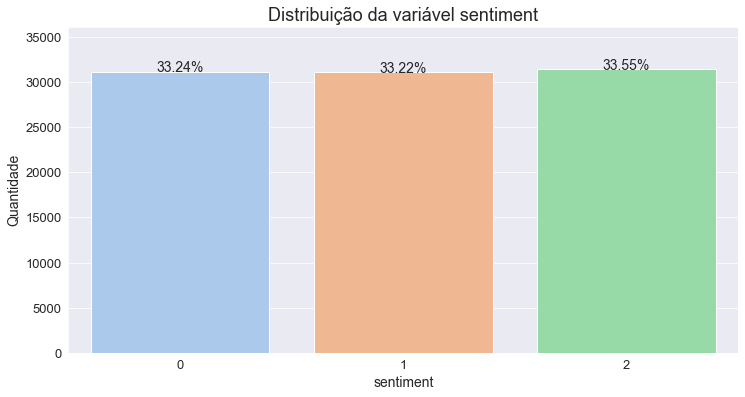

In [208]:
# Distribuição da variavel sentiment

col = 'sentiment'

total = len(dfc)

plt.figure(figsize=(12,6))
g = sns.countplot(x=col, data=dfc, palette=colors)
g.set_title(f"Distribuição da variável {col}")
g.set_xlabel(f"{col}")
g.set_ylabel("Quantidade")
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15)
plt.show()


---

**Conclusões:** 

Analisando a variável **sentiment** podemos constatar que o nosso dataframe contém quantidades de tweets balanceados, diminuindo a tendência do modelo para algum dos sentimentos.


#### query_used

- :(, se negativo (0);
- :), se positivo (1);
- "outros", se neutro (2)


In [196]:
# Quantidade de sentimentos

Counter(dfc['query_used']).most_common()


[(':(', 31130),
 (':)', 31113),
 ('folha', 4989),
 ('estadao', 3880),
 ('#fato', 3444),
 ('g1', 3434),
 ('exame', 3416),
 ('#trabalho', 3027),
 ('jornaloglobo', 2374),
 ('#oportunidade', 2350),
 ('veja', 2098),
 ('#noticia', 1113),
 ('#novidade', 916),
 ('#curiosidade', 381)]

In [246]:
# Avaliação da variável query_used

# Criação de nova variável substituindo os valores "outros" por :|, ou seja, diferente de ":(" e ":)" para 
# agrupar os sentimentos neutros

conditions = [
    (dfc['query_used'] != ':(') & (dfc['query_used'] != ':)'),
    (dfc['query_used'] == ':('),
    (dfc['query_used'] == ':)')]
choices = [':|', ':(', ':)']
dfc['sent_query_used'] = np.select(conditions, choices, default=np.NaN)


In [247]:
# Distribuição de tweets

temp_q = dfc.groupby('sent_query_used').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp_q

temp_q.rename(columns = {'tweet_text':'tweet_text_q'}, inplace = True)


In [248]:
# Concatenando os dataframes auxiliares para avaliar a quantidade de sentimentos e query_used

df_col = pd.concat([temp_q, temp], axis=1)
df_col


sent_query_used  tweet_text_q  sentiment  tweet_text
2  :|              31422         2          31422     
0  :(              31130         0          31130     
1  :)              31113         1          31113


---

**Conclusões**

Notamos que a variável **query_used** foi utilizada para criar a variável de **sentiment** convertendo as strings ":(", ":)" e outros textos em valores numéricos, pois apresentam a mesma quantidade de linhas.


### Analisando as palavras dos textos

In [43]:
# Criando a lista de palavras e o vocabulário de palavras

dfc['list_words'] = dfc['join_f_words'].apply(lambda w:str(w).split())

# Criando vocabulário (collection) para armazenar as palavras e vezes que aparecem
top = Counter([item for sublist in dfc['list_words'] for item in sublist])

print(f"O vocabulário é formado por {len(top)} palavras!")


O vocabulário é formado por 42287 palavras!


In [44]:
# As 20 Palavras mais utilizadas nos textos

temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Palavras','Quantidade']
temp.style.background_gradient(cmap=cmap_colors)


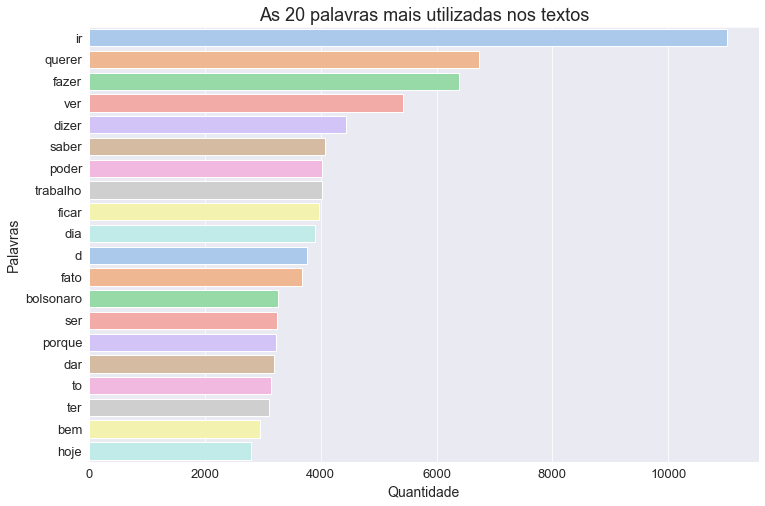

In [45]:
# Analisando a quantidade de palavras mais utilizadas

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp, palette=colors)
g.set_title(f"As 20 palavras mais utilizadas nos textos")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [46]:
# Analisando a quantidade de palavras mais utilizadas

fig = px.treemap(temp, path=['Palavras'], values='Quantidade',title='As 20 palavras mais utilizadas nos textos')
fig.show()


### Palavras mais utilizadas por Sentimento

In [47]:
# Criando dataframes por sentimentos

# negativo
Negative_sent = dfc[dfc['sentiment']==0]
Negative_sent.reset_index(drop=True, inplace=True)

# positivo
Positive_sent = dfc[dfc['sentiment']==1]
Positive_sent.reset_index(drop=True, inplace=True)

# neutro
Neutral_sent = dfc[dfc['sentiment']==2]
Neutral_sent.reset_index(drop=True, inplace=True)


In [48]:
# Lista auxiliar com todas as palavras do dataframe

raw_text = [word for word_list in dfc['list_words'] for word in word_list]


#### Sentimentos Negativos

In [49]:
# Palavras mais utilizadas em sentimentos negativos

top = Counter([item for sublist in Negative_sent['list_words'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Palavras','Quantidade']
temp_negative.style.background_gradient(cmap='Reds')


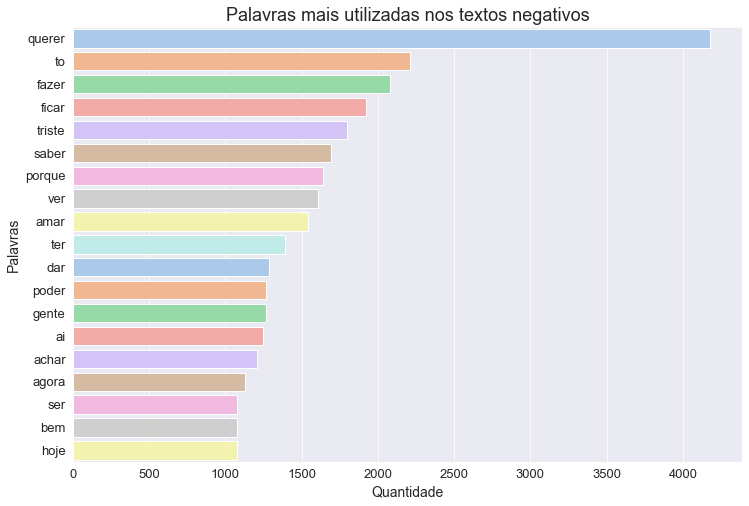

In [50]:
# Apresentação da quantidade de palavras mais utilizadas em sentimentos negativos

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp_negative, palette=colors)
g.set_title(f"Palavras mais utilizadas nos textos negativos")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [51]:
%%time

# O processamento desta célula leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# As 20 palavras utilizadas apenas para o sentimento negativo

Unique_Negative= words_unique(0, 20, raw_text)

print('As 20 palavras mais utilizadas apenas em Tweets negativos:')
Unique_Negative.style.background_gradient(cmap='Reds')


As 20 palavras mais utilizadas apenas em Tweets negativos:
Wall time: 6min 8s


In [52]:
# As 20 palavras utilizadas apenas para o sentimento negativos

fig = px.treemap(Unique_Negative, path=['words'], values='count',title='As 20 palavras mais utilizadas apenas em Tweets negativos')
fig.show()


#### Sentimentos Positivos

In [53]:
# Palavras mais utilizadas em sentimentos positivos

top = Counter([item for sublist in Positive_sent['list_words'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Palavras','Quantidade']
temp_positive.style.background_gradient(cmap=cmap_colors)


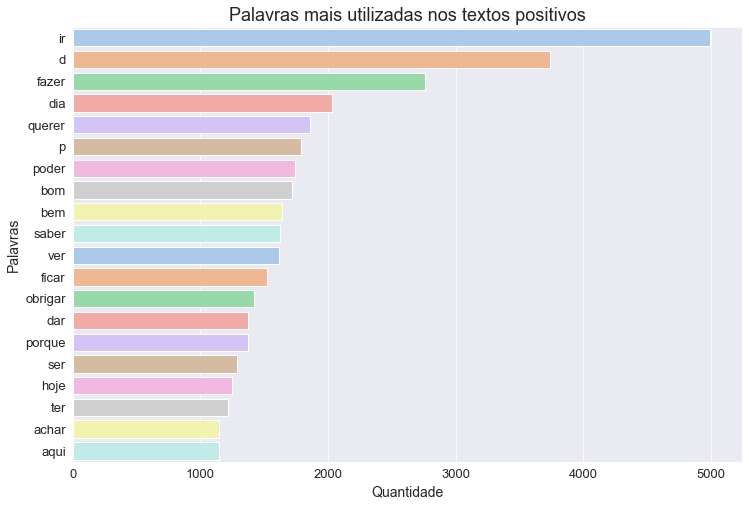

In [54]:
# Apresentação da quantidade de palavras mais utilizadas em sentimentos positivos

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp_positive, palette=colors)
g.set_title(f"Palavras mais utilizadas nos textos positivos")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [55]:
%%time

# O processamento desta célula leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# As 20 palavras utilizadas apenas para o sentimento positivo

Unique_Positive = words_unique(1, 20, raw_text)

print('As 20 palavras mais utilizadas apenas em Tweets positivos:')
Unique_Positive.style.background_gradient(cmap=cmap_colors)


As 20 palavras mais utilizadas apenas em Tweets positivos:
Wall time: 5min 28s


In [56]:
# Apresentação das palavras utilizadas em sentimentos positivos

fig = px.treemap(Unique_Positive, path=['words'], values='count',title='As 20 palavras mais utilizadas apenas em Tweets positivos')
fig.show()


#### Sentimentos Neutros

In [57]:
# Palavras mais utilizadas em sentimentos neutros

top = Counter([item for sublist in Neutral_sent['list_words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Palavras','Quantidade']
temp_neutral.style.background_gradient(cmap=cmap_colors)


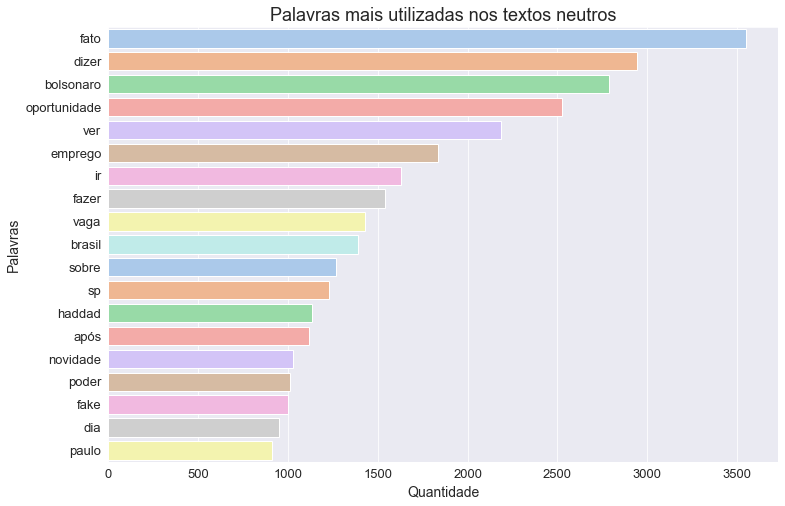

In [58]:
# Apresentação da quantidade de palavras mais utilizadas em sentimentos neutros

plt.figure(figsize=(12,8))

g = sns.barplot(x='Quantidade', y='Palavras', data=temp_neutral, palette=colors)
g.set_title(f"Palavras mais utilizadas nos textos neutros")
g.set_xlabel(f"Quantidade")
g.set_ylabel("Palavras")
plt.show()


In [59]:
%%time

# O processamento desta célula leva em média 10 minutos, em uma máquina i7 com 12 cores e 32 ram 

# As 20 palavras utilizadas apenas para o sentimento neutro

Unique_Neutral= words_unique(2, 20, raw_text)

print('As 20 palavras utilizadas apenas em Tweets neutros:')
Unique_Neutral.style.background_gradient(cmap=cmap_colors)


As 20 palavras utilizadas apenas em Tweets neutros:
Wall time: 4min 34s


In [60]:
# Apresentação das palavras utilizadas em sentimentos neutros

fig = px.treemap(Unique_Neutral, path=['words'], values='count',title='As 20 palavras mais utilizadas apenas em Tweets neutros')
fig.show()


#### WordClouds

**Sentimentos negativos**

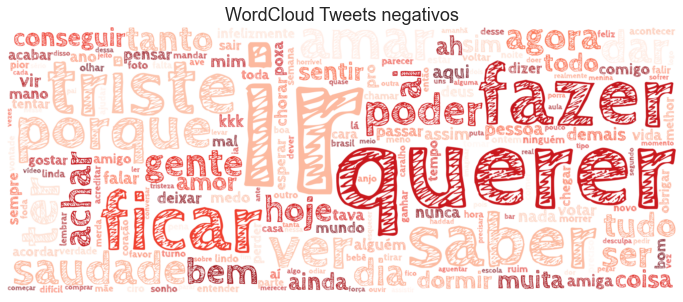

In [61]:
# WordCloud para Tweets negativos

text = ' '.join(Negative_sent['join_f_words'])
plot_wordcloud(text, title = 'WordCloud Tweets negativos', backcolor = 'white', clrmap = 'Reds')


**Sentimentos positivos**

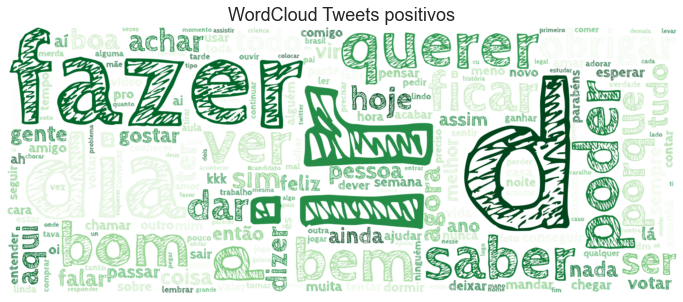

In [62]:
# WordCloud para Tweets positivos

text = ' '.join(Positive_sent['join_f_words'])
plot_wordcloud(text, title = 'WordCloud Tweets positivos', backcolor = 'white', clrmap = 'Greens')


**Sentimentos neutros**

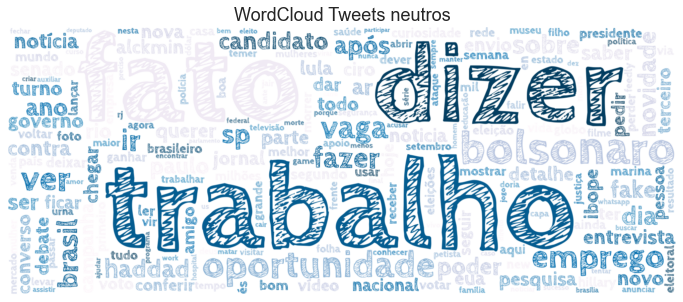

In [63]:
# WordCloud para Tweets neutros

text = ' '.join(Neutral_sent['join_f_words'])
plot_wordcloud(text, title = 'WordCloud Tweets neutros', backcolor = 'white', clrmap = 'PuBu')


---

**Conclusões:** 

- Podemos ver que as mesmas palavras são comuns nos três segmentos;


- Isso é interessante porque algumas palavras são mais de natureza negativa e outras palavras são mais de natureza positiva, o que significa que o agrupamento das palavras (frases) definem os sentimentos;


- Olhando para as palavras únicas de cada sentimento, temos mais clareza sobre os dados, estas palavras únicas são determinantes para o sentimento dos tweets;


## 4. Treinamento do modelo

### Separando conjunto de dados Treino e Teste

In [64]:
# Carregando o arquivo tratado para não reprocessar a etapa 2. Pré-processamento e transformações

# Definindo o nome do arquivo
if use_normalize==1:
    file_name = './dados/train/Train3Classes_with_Token_normalize.csv'
else:
    file_name = './dados/train/Train3Classes_with_Token.csv'
  
# Salvando o CSV
try:
    # Carregar o dataframe
    dfc = reduce_mem_usage(pd.read_csv(file_name))
    
    #Incluindo lista de palavras
    dfc['list_words'] = dfc['join_f_words'].apply(lambda w:str(w).split())
    
    print(f'Arquivo carregado com successo.')
    
except:
    print(f'Ocorreu um erro no carregamento do arquivo.')
    

Mem. usage decreased to  2.50 Mb (50.0% reduction)
Arquivo carregado com successo.


In [65]:
# A nossa base de dados tem mais de 90 mil linhas e a quantidade de palavras disponíveis nos textos é muito grande. 
# Para evitar problemas de alocação de memória, processamento dos textos e modelagem, vamos criar uma amostra com 40% da base:

# Caso o notebook apresente problemas de alocação de memória, favor diminuir o percentual da amostra dos dados.

dfm = dfc.sample(frac=0.4, replace=False)


In [66]:
# Vamos dividir os nossos dados numa matriz X que contém as características a treinar, 
# e uma matriz y com a variável alvo, neste caso a coluna covid_res. 

X = dfm['join_f_words']
y = dfm['sentiment']


In [67]:
# Vamos dividir os dados num conjunto de Train e num conjunto de Test. 
# Iremos treinar o modelo no conjunto de treino e depois utilizaremos o conjunto de testes para avaliar o modelo

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)


In [68]:
# Quantidade total da variável "target" (sentiment)

y.value_counts().sort_index()


0    12455
1    12524
2    12487
Name: sentiment, dtype: int64

In [69]:
# Quantidade separada para o conjunto de treino inicial

y_train.value_counts().sort_index()


0    8780
1    8785
2    8661
Name: sentiment, dtype: int64

In [70]:
# Quantidade separada para o conjunto de teste inicial

y_test.value_counts().sort_index()#(normalize = True)


0    3675
1    3739
2    3826
Name: sentiment, dtype: int64

### Processando modelos

In [71]:
# Lista de modelos para testes

list_models = [
    {'model_name': 'Dummy Classifier uniform',
     'estimator' : DummyClassifier(strategy='uniform', random_state=random_seed)},    
    {'model_name': 'Linear Support Vector Machine',
     'estimator' : LinearSVC(random_state=random_seed)},
    {'model_name': 'Stochastic Gradient Descent Classifier',
     'estimator' : SGDClassifier(n_jobs=-1, loss='modified_huber',random_state=random_seed)},
    {'model_name': 'LightGBM',
     'estimator' : LGBMClassifier(random_state=random_seed)},
    {'model_name': 'Logistic Regression',
     'estimator' : LogisticRegression(random_state=random_seed)},
    {'model_name': 'Classifier Ridge regression',
     'estimator' : RidgeClassifier(random_state=random_seed)},
    {'model_name': 'Naive Bayes Gaussian',
     'estimator' : GaussianNB()},
    {'model_name': 'Bernoulli Naive Bayes',
     'estimator' : BernoulliNB()}
]

# Os modelos abaixo foram retirados por apresentarem tempo de processamento superior 20 minutos com sample de 40% 
# e apresentarem resultado de acurácia muito similares com os modelos escolhidos

#{'model_name': 'Decision Tree',
# 'estimator' : DecisionTreeClassifier(random_state=random_seed)},
#{'model_name': 'Random Forest',
# 'estimator' : RandomForestClassifier(random_state=random_seed)}, 
#{'model_name': 'AdaBoost',
# 'estimator' : AdaBoostClassifier(random_state=random_seed)},
#{'model_name': 'GradientBoosting',
# 'estimator' : GradientBoostingClassifier(random_state=random_seed)},
#{'model_name': 'XGBoost',
# 'estimator' : XGBClassifier(random_state=random_seed)}
#{'model_name': 'Support Vector Machine',
# 'estimator' : SVC(random_state=random_seed)},
#{'model_name': 'KNN (k-nearest neighbor)',
# 'estimator' : KNeighborsClassifier(n_neighbors=3)},
#{'model_name': 'Multinomial Naive Bayes',
#'estimator' : MultinomialNB()},


#### Técnica CountVectorizer

In [72]:
# Instanciando CountVectorizer

cv = CountVectorizer()


In [73]:
# Treinando o modelo com os conjuntos de dados de treinamento 

X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()


**Processando modelos**


Model      : Dummy Classifier uniform
Accuracy   : 0.3388 
Precision  : 0.3390 
Recall     : 0.3388 
F1 - Score : 0.3388 
MAE        : 0.8849 
RMSE       : 1.1542 
R2         : -0.9968 

              precision    recall  f1-score   support

           0       0.33      0.34      0.33      3675
           1       0.34      0.35      0.34      3739
           2       0.34      0.33      0.34      3826

    accuracy                           0.34     11240
   macro avg       0.34      0.34      0.34     11240
weighted avg       0.34      0.34      0.34     11240



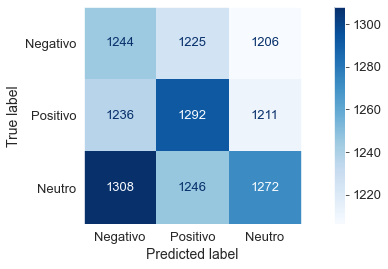

Partial time: 0:00:00.162036

Model      : Linear Support Vector Machine
Accuracy   : 0.7565 
Precision  : 0.7611 
Recall     : 0.7565 
F1 - Score : 0.7578 
MAE        : 0.2627 
RMSE       : 0.5488 
R2         : 0.5486 

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      3675
           1       0.67      0.63      0.65      3739
           2       0.94      0.89      0.92      3826

    accuracy                           0.76     11240
   macro avg       0.76      0.76      0.76     11240
weighted avg       0.76      0.76      0.76     11240



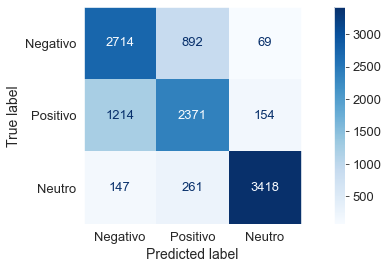

Partial time: 0:00:08.800612

Model      : Stochastic Gradient Descent Classifier
Accuracy   : 0.7648 
Precision  : 0.7692 
Recall     : 0.7648 
F1 - Score : 0.7656 
MAE        : 0.2529 
RMSE       : 0.5370 
R2         : 0.5678 

              precision    recall  f1-score   support

           0       0.67      0.76      0.71      3675
           1       0.69      0.63      0.66      3739
           2       0.94      0.90      0.92      3826

    accuracy                           0.76     11240
   macro avg       0.77      0.76      0.76     11240
weighted avg       0.77      0.76      0.77     11240



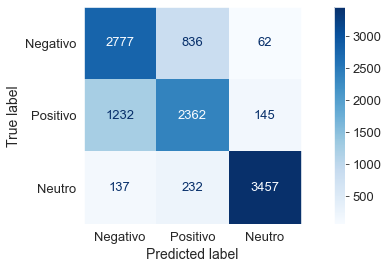

Partial time: 0:00:46.152132

Model      : LightGBM
Accuracy   : 0.7379 
Precision  : 0.7483 
Recall     : 0.7379 
F1 - Score : 0.7401 
MAE        : 0.2834 
RMSE       : 0.5709 
R2         : 0.5115 

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      3675
           1       0.62      0.73      0.67      3739
           2       0.92      0.86      0.89      3826

    accuracy                           0.74     11240
   macro avg       0.75      0.74      0.74     11240
weighted avg       0.75      0.74      0.74     11240



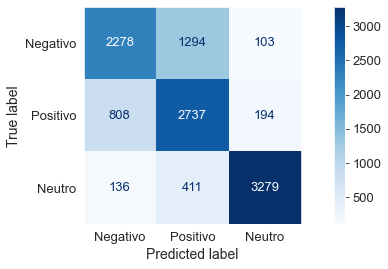

Partial time: 0:00:06.562020

Model      : Logistic Regression
Accuracy   : 0.7691 
Precision  : 0.7730 
Recall     : 0.7691 
F1 - Score : 0.7706 
MAE        : 0.2464 
RMSE       : 0.5266 
R2         : 0.5843 

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      3675
           1       0.68      0.66      0.67      3739
           2       0.95      0.90      0.92      3826

    accuracy                           0.77     11240
   macro avg       0.77      0.77      0.77     11240
weighted avg       0.77      0.77      0.77     11240



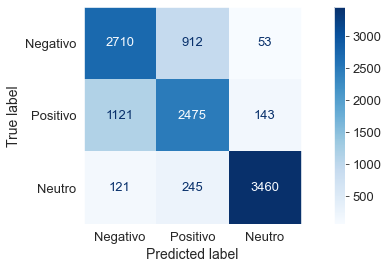

Partial time: 0:01:35.360891

Model      : Classifier Ridge regression
Accuracy   : 0.7468 
Precision  : 0.7542 
Recall     : 0.7468 
F1 - Score : 0.7490 
MAE        : 0.2780 
RMSE       : 0.5724 
R2         : 0.5089 

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      3675
           1       0.66      0.63      0.65      3739
           2       0.93      0.86      0.90      3826

    accuracy                           0.75     11240
   macro avg       0.75      0.75      0.75     11240
weighted avg       0.75      0.75      0.75     11240



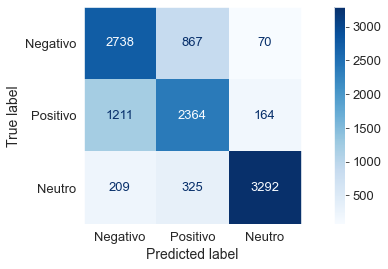

Partial time: 0:02:07.070401

Model      : Naive Bayes Gaussian
Accuracy   : 0.5714 
Precision  : 0.5953 
Recall     : 0.5714 
F1 - Score : 0.5571 
MAE        : 0.5038 
RMSE       : 0.8088 
R2         : 0.0195 

              precision    recall  f1-score   support

           0       0.50      0.83      0.62      3675
           1       0.45      0.28      0.34      3739
           2       0.83      0.61      0.70      3826

    accuracy                           0.57     11240
   macro avg       0.59      0.57      0.56     11240
weighted avg       0.60      0.57      0.56     11240



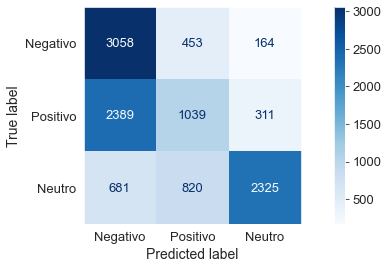

Partial time: 0:00:14.027688

Model      : Bernoulli Naive Bayes
Accuracy   : 0.7517 
Precision  : 0.7656 
Recall     : 0.7517 
F1 - Score : 0.7507 
MAE        : 0.2658 
RMSE       : 0.5485 
R2         : 0.5490 

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      3675
           1       0.69      0.55      0.61      3739
           2       0.96      0.87      0.91      3826

    accuracy                           0.75     11240
   macro avg       0.76      0.75      0.75     11240
weighted avg       0.77      0.75      0.75     11240



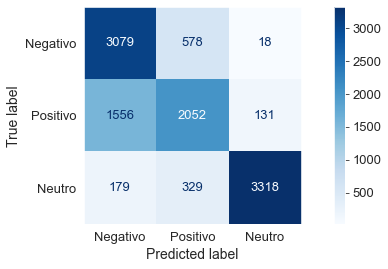

Partial time: 0:00:35.452619
Wall time: 5min 33s


In [74]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 5 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models
score = []

test_models (list_models,
             "model_name",
             "estimator",
             "CountVectorizer",
             X_train_cv,
             X_test_cv,
             y_train,
             y_test)


#### Técnica TF-IDF

In [75]:
#Instanciando TF-IDF

tfidf = TfidfVectorizer(use_idf = True)
    

In [76]:
# Treinando o modelo com os conjuntos de dados de treinamento 

X_train_tfidf = tfidf.fit_transform(X_train).todense()
X_test_tfidf  = tfidf.transform(X_test).todense()


**Processando modelos**


Model      : Dummy Classifier uniform
Accuracy   : 0.3388 
Precision  : 0.3390 
Recall     : 0.3388 
F1 - Score : 0.3388 
MAE        : 0.8849 
RMSE       : 1.1542 
R2         : -0.9968 

              precision    recall  f1-score   support

           0       0.33      0.34      0.33      3675
           1       0.34      0.35      0.34      3739
           2       0.34      0.33      0.34      3826

    accuracy                           0.34     11240
   macro avg       0.34      0.34      0.34     11240
weighted avg       0.34      0.34      0.34     11240



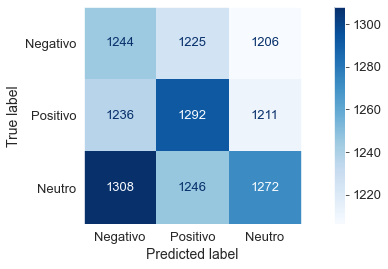

Partial time: 0:00:00.258000

Model      : Linear Support Vector Machine
Accuracy   : 0.7762 
Precision  : 0.7751 
Recall     : 0.7762 
F1 - Score : 0.7756 
MAE        : 0.2399 
RMSE       : 0.5214 
R2         : 0.5925 

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      3675
           1       0.69      0.67      0.68      3739
           2       0.92      0.93      0.93      3826

    accuracy                           0.78     11240
   macro avg       0.77      0.77      0.77     11240
weighted avg       0.78      0.78      0.78     11240



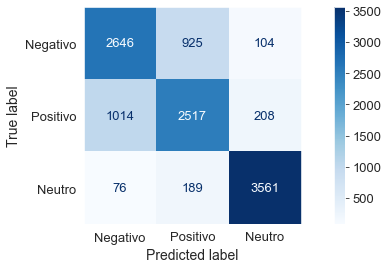

Partial time: 0:00:05.127635

Model      : Stochastic Gradient Descent Classifier
Accuracy   : 0.7829 
Precision  : 0.7792 
Recall     : 0.7829 
F1 - Score : 0.7803 
MAE        : 0.2343 
RMSE       : 0.5185 
R2         : 0.5970 

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3675
           1       0.72      0.66      0.69      3739
           2       0.90      0.95      0.93      3826

    accuracy                           0.78     11240
   macro avg       0.78      0.78      0.78     11240
weighted avg       0.78      0.78      0.78     11240



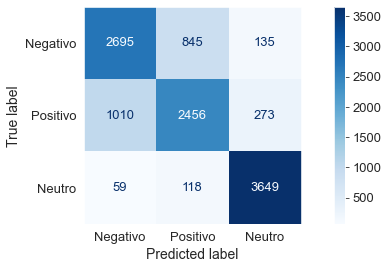

Partial time: 0:00:33.642648

Model      : LightGBM
Accuracy   : 0.7496 
Precision  : 0.7585 
Recall     : 0.7496 
F1 - Score : 0.7520 
MAE        : 0.2674 
RMSE       : 0.5492 
R2         : 0.5479 

              precision    recall  f1-score   support

           0       0.72      0.65      0.68      3675
           1       0.63      0.73      0.67      3739
           2       0.93      0.87      0.90      3826

    accuracy                           0.75     11240
   macro avg       0.76      0.75      0.75     11240
weighted avg       0.76      0.75      0.75     11240



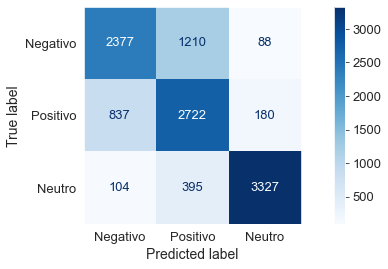

Partial time: 0:00:07.508305

Model      : Logistic Regression
Accuracy   : 0.7817 
Precision  : 0.7799 
Recall     : 0.7817 
F1 - Score : 0.7806 
MAE        : 0.2356 
RMSE       : 0.5197 
R2         : 0.5951 

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      3675
           1       0.70      0.70      0.70      3739
           2       0.91      0.94      0.92      3826

    accuracy                           0.78     11240
   macro avg       0.78      0.78      0.78     11240
weighted avg       0.78      0.78      0.78     11240



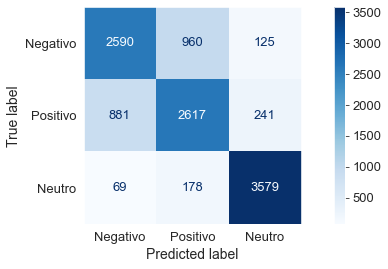

Partial time: 0:01:31.878057

Model      : Classifier Ridge regression
Accuracy   : 0.7749 
Precision  : 0.7730 
Recall     : 0.7749 
F1 - Score : 0.7739 
MAE        : 0.2415 
RMSE       : 0.5236 
R2         : 0.5890 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      3675
           1       0.69      0.67      0.68      3739
           2       0.91      0.93      0.92      3826

    accuracy                           0.77     11240
   macro avg       0.77      0.77      0.77     11240
weighted avg       0.77      0.77      0.77     11240



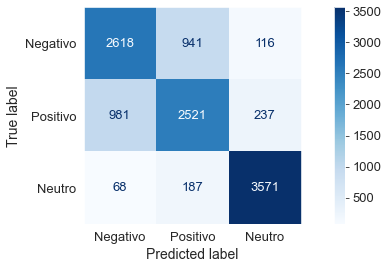

Partial time: 0:02:27.068852

Model      : Naive Bayes Gaussian
Accuracy   : 0.5767 
Precision  : 0.5925 
Recall     : 0.5767 
F1 - Score : 0.5629 
MAE        : 0.4985 
RMSE       : 0.8055 
R2         : 0.0275 

              precision    recall  f1-score   support

           0       0.51      0.81      0.63      3675
           1       0.46      0.29      0.36      3739
           2       0.80      0.63      0.70      3826

    accuracy                           0.58     11240
   macro avg       0.59      0.58      0.56     11240
weighted avg       0.59      0.58      0.56     11240



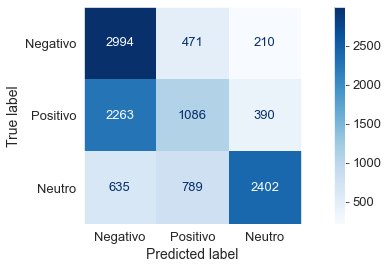

Partial time: 0:00:14.284400

Model      : Bernoulli Naive Bayes
Accuracy   : 0.7517 
Precision  : 0.7656 
Recall     : 0.7517 
F1 - Score : 0.7507 
MAE        : 0.2658 
RMSE       : 0.5485 
R2         : 0.5490 

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      3675
           1       0.69      0.55      0.61      3739
           2       0.96      0.87      0.91      3826

    accuracy                           0.75     11240
   macro avg       0.76      0.75      0.75     11240
weighted avg       0.77      0.75      0.75     11240



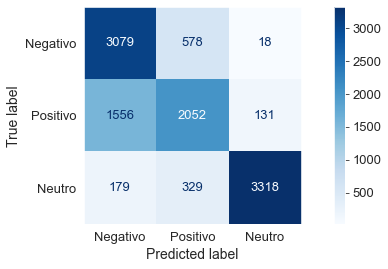

Partial time: 0:00:06.606958
Wall time: 5min 6s


In [77]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 5 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models

test_models (list_models,
             "model_name",
             "estimator",
             "TF-IDF",
             X_train_tfidf,
             X_test_tfidf,
             y_train,
             y_test)


#### Técnica Doc2Vec

In [78]:
# Instanciando Doc2Vec

d2v = doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=20)


In [79]:
# Vamos dividir os nossos dados numa matriz X que contém as características a treinar, 
# e uma matriz y com a variável alvo, neste caso a coluna covid_res. 

X_d2v = dfm['list_words']
y_d2v = dfm['sentiment']


In [80]:
# Vamos dividir os dados num conjunto de Train e num conjunto de Test. 
# Iremos treinar o modelo no conjunto de treino e depois utilizaremos o conjunto de testes para avaliar o modelo

X_train_d2v, X_test_d2v, y_train_d2v, y_test_d2v = train_test_split(X_d2v, y_d2v, test_size=0.3, random_state=random_seed)


In [81]:
%%time
# Preparando a classe de treinamento e teste

# O processamento desta célula com o processamento dos modelos leva em média 2 minutos, em uma máquina i7 com 12 cores e 32 ram 

train_corpus = read_corpus(X_train_d2v)
test_corpus = read_corpus(X_test_d2v, tokens_only=True)

d2v.build_vocab(train_corpus)

d2v.train(train_corpus, total_examples=d2v.corpus_count, epochs=d2v.epochs)

X_train_d2v = np.array(list(map(d2v.infer_vector, X_train_d2v)))
X_test_d2v = np.array(list(map(d2v.infer_vector, X_test_d2v)))


Wall time: 1min 6s


**Processando modelos**


Model      : Dummy Classifier uniform
Accuracy   : 0.3388 
Precision  : 0.3390 
Recall     : 0.3388 
F1 - Score : 0.3388 
MAE        : 0.8849 
RMSE       : 1.1542 
R2         : -0.9968 

              precision    recall  f1-score   support

           0       0.33      0.34      0.33      3675
           1       0.34      0.35      0.34      3739
           2       0.34      0.33      0.34      3826

    accuracy                           0.34     11240
   macro avg       0.34      0.34      0.34     11240
weighted avg       0.34      0.34      0.34     11240



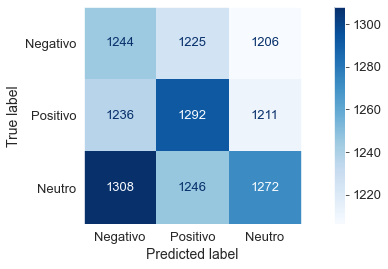

Partial time: 0:00:00.167963

Model      : Linear Support Vector Machine
Accuracy   : 0.6500 
Precision  : 0.6473 
Recall     : 0.6500 
F1 - Score : 0.6476 
MAE        : 0.4355 
RMSE       : 0.7788 
R2         : 0.0909 

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      3675
           1       0.62      0.55      0.58      3739
           2       0.73      0.78      0.75      3826

    accuracy                           0.65     11240
   macro avg       0.65      0.65      0.65     11240
weighted avg       0.65      0.65      0.65     11240



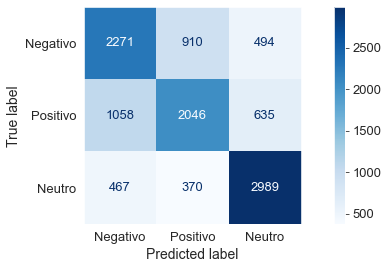

Partial time: 0:00:02.626698

Model      : Stochastic Gradient Descent Classifier
Accuracy   : 0.6286 
Precision  : 0.6459 
Recall     : 0.6286 
F1 - Score : 0.6119 
MAE        : 0.4816 
RMSE       : 0.8379 
R2         : -0.0523 

              precision    recall  f1-score   support

           0       0.56      0.70      0.62      3675
           1       0.71      0.36      0.48      3739
           2       0.66      0.83      0.74      3826

    accuracy                           0.63     11240
   macro avg       0.65      0.63      0.61     11240
weighted avg       0.65      0.63      0.61     11240



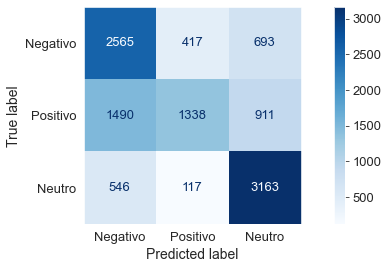

Partial time: 0:00:00.499001

Model      : LightGBM
Accuracy   : 0.6899 
Precision  : 0.6939 
Recall     : 0.6899 
F1 - Score : 0.6905 
MAE        : 0.3614 
RMSE       : 0.6812 
R2         : 0.3044 

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      3675
           1       0.62      0.57      0.59      3739
           2       0.84      0.81      0.82      3826

    accuracy                           0.69     11240
   macro avg       0.69      0.69      0.69     11240
weighted avg       0.69      0.69      0.69     11240



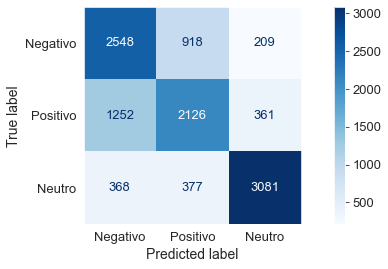

Partial time: 0:00:01.722000

Model      : Logistic Regression
Accuracy   : 0.6488 
Precision  : 0.6486 
Recall     : 0.6488 
F1 - Score : 0.6486 
MAE        : 0.4309 
RMSE       : 0.7683 
R2         : 0.1152 

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      3675
           1       0.60      0.58      0.59      3739
           2       0.75      0.76      0.76      3826

    accuracy                           0.65     11240
   macro avg       0.65      0.65      0.65     11240
weighted avg       0.65      0.65      0.65     11240



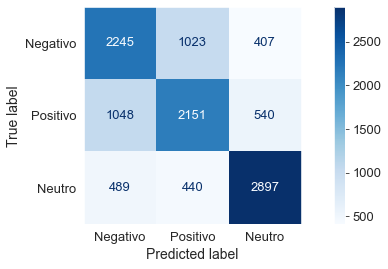

Partial time: 0:00:01.213523

Model      : Classifier Ridge regression
Accuracy   : 0.6451 
Precision  : 0.6418 
Recall     : 0.6451 
F1 - Score : 0.6418 
MAE        : 0.4444 
RMSE       : 0.7896 
R2         : 0.0656 

              precision    recall  f1-score   support

           0       0.60      0.61      0.60      3675
           1       0.62      0.54      0.57      3739
           2       0.71      0.79      0.75      3826

    accuracy                           0.65     11240
   macro avg       0.64      0.64      0.64     11240
weighted avg       0.64      0.65      0.64     11240



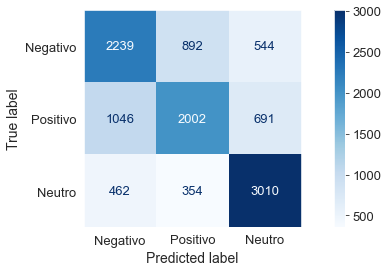

Partial time: 0:00:00.214710

Model      : Naive Bayes Gaussian
Accuracy   : 0.5607 
Precision  : 0.5971 
Recall     : 0.5607 
F1 - Score : 0.5552 
MAE        : 0.5648 
RMSE       : 0.9031 
R2         : -0.2226 

              precision    recall  f1-score   support

           0       0.46      0.75      0.57      3675
           1       0.55      0.33      0.41      3739
           2       0.78      0.60      0.68      3826

    accuracy                           0.56     11240
   macro avg       0.59      0.56      0.55     11240
weighted avg       0.60      0.56      0.56     11240



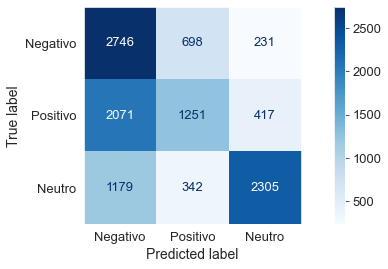

Partial time: 0:00:00.219001

Model      : Bernoulli Naive Bayes
Accuracy   : 0.5964 
Precision  : 0.5962 
Recall     : 0.5964 
F1 - Score : 0.5958 
MAE        : 0.4963 
RMSE       : 0.8255 
R2         : -0.0215 

              precision    recall  f1-score   support

           0       0.56      0.60      0.58      3675
           1       0.53      0.50      0.52      3739
           2       0.70      0.69      0.69      3826

    accuracy                           0.60     11240
   macro avg       0.60      0.60      0.59     11240
weighted avg       0.60      0.60      0.60     11240



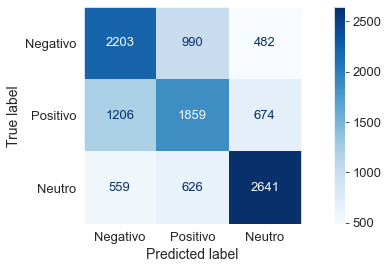

Partial time: 0:00:00.214002
Wall time: 6.88 s


In [82]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 7 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Processando os modelos baseado na list_models

test_models (list_models,
             "model_name",
             "estimator",
             "Doc2Vec",
             X_train_d2v,
             X_test_d2v,
             y_train_d2v,
             y_test_d2v)


#### Avaliação dos modelos

In [83]:
# Conmparação das pontuações após técnicas de balanceamento
# Ordenando a pontuação
score.sort(key = lambda y:y[2],reverse =True)

# Exibindo a pontuação
dfscore = pd.DataFrame (score, columns = ['Modelo', 'Técnica', 'Acurácia'])

# Apresenta o modelo que obteve a melhor acurácia
print(f'O modelo {dfscore.iloc[0][0]} apresentou a melhor acurácia {dfscore.iloc[0][2]}.\n')
print("Comparação da Acurácia dos modelos: ")
dfscore

O modelo Stochastic Gradient Descent Classifier apresentou a melhor acurácia 0.7829181494661922.

Comparação da Acurácia dos modelos: 


Modelo          Técnica  Acurácia
0   Stochastic Gradient Descent Classifier  TF-IDF           0.782918
1   Logistic Regression                     TF-IDF           0.781673
2   Linear Support Vector Machine           TF-IDF           0.776157
3   Classifier Ridge regression             TF-IDF           0.774911
4   Logistic Regression                     CountVectorizer  0.769128
5   Stochastic Gradient Descent Classifier  CountVectorizer  0.764769
6   Linear Support Vector Machine           CountVectorizer  0.756495
7   Bernoulli Naive Bayes                   CountVectorizer  0.751690
8   Bernoulli Naive Bayes                   TF-IDF           0.751690
9   LightGBM                                TF-IDF           0.749644
10  Classifier Ridge regression             CountVectorizer  0.746797
11  LightGBM                                CountVectorizer  0.737900
12  LightGBM                                Doc2Vec          0.689947
13  Linear Support Vector Machine           Doc2Vec          0.650000
14  Logistic Regression                     Doc2Vec          0.648843
15  Classifier Ridge regression             Doc2Vec          0.645107
16  Stochastic Gradient Descent Classifier  Doc2Vec          0.628648
17  Bernoulli Naive Bayes                   Doc2Vec          0.596352
18  Naive Bayes Gaussian                    TF-IDF           0.576690
19  Naive Bayes Gaussian                    CountVectorizer  0.571352
20  Naive Bayes Gaussian                    Doc2Vec          0.560676
21  Dummy Classifier uniform                CountVectorizer  0.338790
22  Dummy Classifier uniform                TF-IDF           0.338790
23  Dummy Classifier uniform                Doc2Vec          0.338790

--- 

**Conclusões**

Os modelos listados para avaliação foram escolhidos pelo critério de tempo de de processamento e acurácia para uma amostra de 40% do dataframe. 

A lista pode ser acrescida de outros modelos, porém o tempo de processamento do notebook pode ser extremamente longo, exemplo GradientBoostingClassifier com tempo de processamento superior a 40 min e acurácia similar ao Stochastic Gradient Descent Classifier que executa em segundos.

Os modelos foram treinados com as amostras utilizando técnicas para conversão de texto de Bag of Words (BoW) ContVectorizer / TF-IDF e Doc2Vec.

O critério de avaliação levou em consideração apenas o maior resultado apresentado pela acurácia do modelo. 


#### Otimização do Modelo

In [84]:
# Modelo que apresentou a melhor acurácia

#model = LogisticRegression(random_state=random_seed)
model = SGDClassifier(n_jobs=-1, max_iter=1000, random_state=random_seed)
 

###### Aplicando GridSearchCV

In [89]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 30 minutos, em uma máquina i7 com 12 cores e 32 ram 

# Definindo valores iniciais para ajuste de parametro de reforço

# LogisticRegression
# param_gs = {'C': [1, 10, 100], 'penalty': ['l2'], 'max_iter': list(range(100,300,100))}

# SGDClassifier
param_gs = {'alpha': [0.0001, 0.001, 0.01, 0.1], 'penalty': ['l2'], "loss" : ["hinge", "log", "modified_huber"]}


# Instanciando GridSearchCV com a variação dos parametros 
gsearch = GridSearchCV(estimator=model, param_grid=param_gs, scoring='accuracy', refit=True, cv=3, verbose=2)

# Treinando o modelo com os conjuntos de dados
gsearch.fit(X_train_tfidf, y_train)

# Apresentação dos melhores parametros e melhor resultado
print('\nPrecisão média: %.5f' % gsearch.best_score_)
print('Configuração: %s' % gsearch.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  21.0s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  23.9s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  21.1s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  14.3s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  14.7s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  17.6s
[CV] END .......alpha=0.0001, loss=squared_hinge, penalty=l2; total time= 9.6min
[CV] END .......alpha=0.0001, loss=squared_hinge, penalty=l2; total time= 9.8min
[CV] END .......alpha=0.0001, loss=squared_hinge, penalty=l2; total time= 9.6min
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  32.3s
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  31.6s
[CV] END ......alpha=0.0001, loss=modified_huber

##### Aplicando RandomizedSearchCV

In [90]:
%%time

# O processamento desta célula com o processamento dos modelos leva em média 30 minutos, em uma máquina i7 com 12 cores e 32 ram 

# LogisticRegression
#param_rs = {'C': [1, 10, 100], 'penalty': ['l2'], 'max_iter': list(range(100,300,100))}

# SGDClassifier
param_rs = {'alpha': [0.0001, 0.001, 0.01, 0.1], 'penalty': ['l2'], "loss" : ["hinge", "log", "modified_huber"]}

# Instanciando RandomizedSearchCV com a variação dos parametros 
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_rs, scoring='accuracy', n_iter=100, cv=3, verbose=2)

# Treinando o modelo com os conjuntos de dados
rsearch.fit(X_train_tfidf, y_train)

# Apresentação dos melhores parametros e melhor resultado
print('\nPrecisão média: %.5f' % rsearch.best_score_)
print('Configuração: %s' % rsearch.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  21.4s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  21.7s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  19.4s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  13.3s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  14.0s
[CV] END .................alpha=0.0001, loss=log, penalty=l2; total time=  16.3s
[CV] END .......alpha=0.0001, loss=squared_hinge, penalty=l2; total time= 9.1min
[CV] END .......alpha=0.0001, loss=squared_hinge, penalty=l2; total time= 9.2min
[CV] END .......alpha=0.0001, loss=squared_hinge, penalty=l2; total time= 9.1min
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  30.9s
[CV] END ......alpha=0.0001, loss=modified_huber, penalty=l2; total time=  30.6s
[CV] END ......alpha=0.0001, loss=modified_huber

---

**Conclusões**

Após aplicar técnicas com alguns parametros para otimização identificamos o GridSearchCV e RandomizedSearchCV apresentaram o mesmo valor e  não melhoraram a precisão do modelo.

Existem diversas combinações de parametros para serem testados que podem melhorar a precisão do modelo, neste notebook abordamos alguns parametros para apresentar a utilização. 


#### Predição do arquivo de submissão

In [97]:
# O texto do arquivo (tweet_text) de submissão foi tratado com o mesmo processo do arquivo Train3Classes

# Quantidade de linhas e colunas

sqtl, sqtc = dfs.shape

print(f'Quantidade de linhas...........: {sqtl}')
print(f'Quantidade de colunas..........: {sqtc}')


Quantidade de linhas...........: 5000
Quantidade de colunas..........: 9


In [93]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5000 non-null   int64 
 1   tweet_text      5000 non-null   object
 2   tweet_date      5000 non-null   object
 3   query_used      5000 non-null   object
 4   filtered_words  5000 non-null   object
 5   join_f_words    5000 non-null   object
 6   num_words_text  5000 non-null   int64 
 7   num_words_join  5000 non-null   int64 
 8   diff_in_words   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


In [101]:
# Listagem das primeiras linhas do dataframe

dfs[['tweet_text', 'filtered_words', 'join_f_words','num_words_text','num_words_join', 'diff_in_words']].head()


tweet_text  \
0  Apartamento Vila Mariana Praça Monteiro dos Santos O iMudou é especialista em imóveis e encontrou 7 oportunidades para a busca apartamento vila mariana praca monteiro dos santos. Temos as ofertas com o menor preço! :) https://t.co/8JlJ0N1Ewe   
1  @FalleNCS @BrasilGameShow quero 1x1 de scout. Dizem que dou muita bala cagada :)                                                                                                                                                                    
2  mais uma analógica no correio à minha espera :D Só falta receber duas lentes e começar a revelar em casa.                                                                                                                                           
3  Em festa de posse como presidente do STF, Toffoli canta Legião Urbana https://t.co/IEs709I35Z                                                                                                                                                       
4  @thethiagor @jubsilva @GSCISA @GrupoMulheRIs A Flávia tem tuiter também @fmedeirosss :)                                                                                                                                                             

                                                                                                                                                                                      filtered_words  \
0  [apartamento, vila, mariana, praça, monteiro, santos, mudar, especialista, imóveis, encontrar, oportunidades, buscar, apartamento, vila, mariana, praça, monteiro, santos, ofertas, menor, preço]   
1  [querer, scout, dizer, dar, muita, bala, cagar]                                                                                                                                                     
2  [analógica, correio, esperar, d, falta, receber, duas, lentes, começar, revelar, casa]                                                                                                              
3  [festa, posse, presidente, senado, relator, cantar, legião, urbana]                                                                                                                                 
4  [flávia, twitter]                                                                                                                                                                                   

                                                                                                                                                                  join_f_words  \
0  apartamento vila mariana praça monteiro santos mudar especialista imóveis encontrar oportunidades buscar apartamento vila mariana praça monteiro santos ofertas menor preço   
1  querer scout dizer dar muita bala cagar                                                                                                                                       
2  analógica correio esperar d falta receber duas lentes começar revelar casa                                                                                                    
3  festa posse presidente senado relator cantar legião urbana                                                                                                                    
4  flávia twitter                                                                                                                                                                

   num_words_text  num_words_join  diff_in_words  
0  36              21              15             
1  13              7               6              
2  20              11              9              
3  13              8               5              
4  11              2               9

**Pré-processamento e transformação**

In [103]:

# Verificando quais linhas não apresentam valor após o tratamento do texto

# Quantidade de linhas vazias
qtd, _ = dfs[np.where((dfs['join_f_words'].str.len()<1), True, False)].shape

print('Dataframe dfs')
print(f'Quantidade de linhas vazias ...: {qtd}')


Dataframe dfs
Quantidade de linhas vazias ...: 28


In [105]:

# Retirando as linhas que ficaram sem texto para análise
dfs = dfs[np.where((dfs['join_f_words'].str.len()>1), True, False)].copy()

# Quantidade de linhas vazias
qtd, _ = dfs[np.where((dfs['join_f_words'].str.len()<1), True, False)].shape

print('Dataframe dfs')
print(f'Quantidade de linhas vazias ...: {qtd}')


Dataframe dfs
Quantidade de linhas vazias ...: 0


In [106]:
# Avaliando os valores nulos do dataframe

missing_values_table(dfs)


O dataframe tem 9 colunas e 4970 linhas.
Existem 0 colunas que têm valores faltantes.


Empty DataFrame
Columns: [Valores faltantes, % de Valores Totais, Data Type]
Index: []

---

**Conclusões**

O dataframe de submissão não apresenta valores nulos ou que causariam qualquer problema para o processamento do modelo.

**Processando o melhor modelo**

In [124]:
%%time

# Definição do modelo
model = SGDClassifier(loss='modified_huber', n_jobs=-1, random_state=42)

# Treinando o modelo
model.fit(X_train_tfidf, y_train)

# Definição dos dados numa matriz X_subm que contém o texto do novo dataframe
X_subm = dfs['join_f_words']
X_subm_tfidf = tfidf.transform(X_subm).todense()

# Predição de sentimentos do texo
y_predict_subm = model.predict(X_subm_tfidf)

# # Cria a coluna de predição logistica
dfs["predict_SGDC"] = y_predict_subm

Wall time: 34 s


In [191]:

print(len(dfs[dfs['query_used']==':)']))
print(len(dfs[dfs['predict_SGDC']==1]))

print(len(dfs[dfs['query_used']==':(']))
print(len(dfs[dfs['predict_SGDC']==0]))

print(len(dfs[(dfs['query_used']!=':(') & (dfs['query_used']!=':)')]))
print(len(dfs[dfs['predict_SGDC']==2]))


1648
1499
1618
1661
1704
1810


In [126]:
%%time

# Definição do modelo
model = LogisticRegression(random_state=random_seed)

# Treinando o modelo 
model.fit(X_train_tfidf, y_train)

# Definição dos dados numa matriz X_subm que contém o texto do novo dataframe
X_subm = dfs['join_f_words']
X_subm_tfidf = tfidf.transform(X_subm).todense()

# Predição de sentimentos do texo
y_predict_subm = model.predict(X_subm_tfidf)

# Cria a coluna de predição logistica
dfs['predict_LR'] = y_predict_subm

Wall time: 1min 38s


In [190]:

print(len(dfs[dfs['query_used']==':)']))
print(len(dfs[dfs['predict_LR']==1]))

print(len(dfs[dfs['query_used']==':(']))
print(len(dfs[dfs['predict_LR']==0]))

print(len(dfs[(dfs['query_used']!=':(') & (dfs['query_used']!=':)')]))
print(len(dfs[dfs['predict_LR']==2]))

1648
1671
1618
1554
1704
1745


In [187]:

print(len(dfs[dfs['query_used']==':(']))
print(len(dfs[dfs['predict_LR']==0]))


1618
1554


In [188]:

print(len(dfc[dfc['query_used']==':)']))
print(len(dfc[dfc['sentiment']==1]))


31113
31113


In [189]:

print(len(dfc[dfc['query_used']==':)']))
print(len(dfc[dfc['sentiment']==1]))

print(len(dfc[dfc['query_used']==':(']))
print(len(dfc[dfc['sentiment']==0]))

print(len(dfc[(dfc['query_used']!=':(') & (dfc['query_used']!=':)')]))
print(len(dfc[dfc['sentiment']==2]))

31113
31113
31130
31130
31422
31422


In [152]:
print(len(dfc[(dfc['query_used']!=':(') & (dfc['query_used']!=':)')]))
print(len(dfc[dfc['sentiment']==2]))

31422
31422


In [ ]:
df['query_used_sentiment'] = df['dollars_spent'].apply(lambda x: 1 if x > 0 else 0)

dfc.loc[dfc['query_used']==':(', 'c2'] = 10


In [129]:

Counter(dfc['query_used'])

Counter({'folha': 4989,
         ':(': 31130,
         'exame': 3416,
         ':)': 31113,
         '#fato': 3444,
         'g1': 3434,
         '#novidade': 916,
         '#noticia': 1113,
         'estadao': 3880,
         'jornaloglobo': 2374,
         '#curiosidade': 381,
         '#oportunidade': 2350,
         'veja': 2098,
         '#trabalho': 3027})

id  \
0     1046764676707753987   
1     1047329264943751169   
2     1045443874947313665   
3     1040484298711814144   
4     1045411876887306240   
...                   ...   
4995  1049243861732794369   
4996  1039334757690163201   
4997  1049286902577356801   
4998  1045349300744671232   
4999  1046943420210659328   

                                                                                                                                                                                                                                             tweet_text  \
0     Apartamento Vila Mariana Praça Monteiro dos Santos O iMudou é especialista em imóveis e encontrou 7 oportunidades para a busca apartamento vila mariana praca monteiro dos santos. Temos as ofertas com o menor preço! :) https://t.co/8JlJ0N1Ewe   
1     @FalleNCS @BrasilGameShow quero 1x1 de scout. Dizem que dou muita bala cagada :)                                                                                                                                                                    
2     mais uma analógica no correio à minha espera :D Só falta receber duas lentes e começar a revelar em casa.                                                                                                                                           
3     Em festa de posse como presidente do STF, Toffoli canta Legião Urbana https://t.co/IEs709I35Z                                                                                                                                                       
4     @thethiagor @jubsilva @GSCISA @GrupoMulheRIs A Flávia tem tuiter também @fmedeirosss :)                                                                                                                                                             
...                                                                                       ...                                                                                                                                                             
4995  Não é nada demais , apenas a verdade :) — Oh... Pronto... Obrigadaaaaa :)) https://t.co/RrHMBmHGor                                                                                                                                                  
4996  Veja o que é #FATO ou #FAKE na entrevista de Anthony Garotinho ao RJTV. https://t.co/cy5k3h1kOX                                                                                                                                                     
4997  @nattvieiira de quem???? queria ver, eu sai por causa do lucas :(                                                                                                                                                                                   
4998  ASSASSIN'S CREED ORIGINS: ENFRENTANDO OS IRMÃOS ZÉ RUELA!!! : ): https://t.co/ohOkYL9T0T via @YouTube                                                                                                                                               
4999  a gnt conversava muito mas paramos :( te acho mt engraçado cara KKKKK a gnt trocava mt meme                                                                                                                                                         

                          tweet_date query_used  \
0     Mon Oct 01 14:12:01 +0000 2018  :)          
1     Wed Oct 03 03:35:29 +0000 2018  :)          
2     Thu Sep 27 22:43:37 +0000 2018  :)          
3     Fri Sep 14 06:16:02 +0000 2018  folha       
4     Thu Sep 27 20:36:28 +0000 2018  :)          
...                              ...  ..          
4995  Mon Oct 08 10:23:25 +0000 2018  :)          
4996  Tue Sep 11 02:08:10 +0000 2018  #fato       
4997  Mon Oct 08 13:14:27 +0000 2018  :(          
4998  Thu Sep 27 16:27:49 +0000 2018  :)          
4999  Tue Oct 02 02:02:17 +0000 2018  :(          

                                                

In [ ]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

In [ ]:
sms['message_len'] = sms.message.apply(len)
sms.head()

In [ ]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

Muito interessante! Através apenas do EDA básico conseguimos descobrir uma tendência de que as mensagens de spam tendem a ter mais caracteres.

## 5. Conclusões


Em análise de consistência dos dados, efetuei carga dos arquivos Train3Classes.csv e Subm3Classes.csv e verifiquei as informações básicas dos arqivos, como quantidade de variáveis (colunas) e 

No processo de EAD identificamos que existem diversos pacientes com as mesmas caracteristicas que definem se o paciente é positivo ou não para COVID, dessa forma optamos em retirar os dados duplicados reduzindo a amostra total em 88%.

No processamento dos modelos identificamos que o melhor modelo é o GradientBoostingClassifier que apresentou a melhores métrica de ROC-UAC e acurácia.

Para avaliação dos melhores parametros focamos em utilizar os parametros baseados em árvore e parâmetros de reforço, os processamentos foram separados para diminuir o tempo de processamento para a avaliação dos parametros, pois eram muito lentos.

Com as técnicas acima conseguimos obter os seguintes resultados:

Dataframe reduzido <br>
Relatório do Modelo GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features=4,
                           min_samples_leaf=10, min_samples_split=1200,
                           n_estimators=2000, random_state=42, subsample=0.8,
                           warm_start=True)

Acuracia : 0.6378<br>
AUC Score (Train): 0.637701<br>
CV Score : Mean - 0.5409638 | Std - 0.02970711 | Min - 0.4838303 | Max - 0.5630645<br>
Wall time: 4min 6s<br>



Dataframe com dados duplicados <br>

Relatório do Modelo GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features=4,
                           min_samples_leaf=10, min_samples_split=1200,
                           n_estimators=2000, random_state=42, subsample=0.8,
                           warm_start=True)<br>

Acuracia : 0.6487<br>
AUC Score (Train): 0.620300<br>
CV Score : Mean - 0.6528905 | Std - 0.002298679 | Min - 0.6500688 | Max - 0.6569856<br>
Wall time: 45min 57s<br>

